# Markov chain Monte Carlo

The main technical challenge in using Bayesian models resides in calculating the model's joint posterior distribution. 

Recall that we are interested in combining the information from our data, via the likelihood function, and prior information to produce a joint posterior distribution for the model of interest:

$$Pr(\theta | y) \propto Pr(y|\theta) Pr(\theta)$$

However, to guarantee that the posterior 

$$Pr(\theta | y) = \frac{Pr(y|\theta) Pr(\theta)}{Pr(y)}$$



$$Pr(\theta | y) = \frac{Pr(y|\theta) Pr(\theta)}{\int_{\theta} Pr(y|\theta) Pr(\theta) d\theta}$$


The two alternative strategies to obtaining posteriors for moderate to large models involve either analytic **approximations** or stochastic **sampling**. Approximations are usually valid conditional on assumptions regarding the true posterior distribution, which are typically impossible to validate. Direct sampling strategies rely on our ability to sample from the posterior distribution, and this is frequently not possible. Indirect sampling methods, such as rejection sampling, can be plagued with sampling efficiency issues.

The sampling approaches we have introduced so far have each attempted to obtain *independent* samples from the posterior distribution. It turns out, however, that it is possible to generate samples from the posterior distribution using a *dependent* sampling algorithm, and despite the dependence of the samples, one may extract valid inference from them. A class of algorithms called **Markov chain Monte Carlo** yields a Markovian sample (explained below) which, provided that certain conditions are satisfied, is guaranteed to be indistinguishable from a sample drawn from the true posterior itself.

## Markov Chains

A Markov chain is a special type of *stochastic process*. The standard definition of a stochastic process is an ordered collection of random variables:

$$\{X_t: t \in T\}$$

where $t$ is frequently (but not necessarily) a time index. If we think of $X_t$ as a state $X$ at time $t$, and invoke the following dependence condition on each state:

$$Pr(X_{t+1}=x_{t+1} | X_t=x_t, X_{t-1}=x_{t-1},\ldots,X_0=x_0) = Pr(X_{t+1}=x_{t+1} | X_t=x_t)$$

then the stochastic process is known as a Markov chain. This conditioning specifies that the future depends on the current state, but not past states. Thus, the Markov chain wanders about the state space,
remembering only where it has just been in the last time step. The collection of transition probabilities is sometimes called a *transition matrix* when dealing with discrete states, or more generally, a
*transition kernel*.

In the context of Markov chain Monte Carlo, it is useful to think of the Markovian property as “mild non-independence”. MCMC allows us to indirectly generate independent samples from a particular posterior distribution.


## Why MCMC Works: Reversible Markov Chains

Markov chain Monte Carlo simulates a Markov chain for which some function of interest
(*e.g.* the joint distribution of the parameters of some model) is the unique, invariant limiting distribution. An invariant distribution with respect to some Markov chain with transition kernel $Pr(y \mid x)$ implies that:

$$\int_x Pr(y \mid x) \pi(x) dx = \pi(y).$$

Invariance is guaranteed for any *reversible* Markov chain. Consider a Markov chain in reverse sequence:
$\{\theta^{(n)},\theta^{(n-1)},...,\theta^{(0)}\}$. This sequence is still Markovian, because:

$$Pr(\theta^{(k)}=y \mid \theta^{(k+1)}=x,\theta^{(k+2)}=x_1,\ldots ) = Pr(\theta^{(k)}=y \mid \theta^{(k+1)}=x$$

Forward and reverse transition probabilities may be related through Bayes theorem:

$$\frac{Pr(\theta^{(k+1)}=x \mid \theta^{(k)}=y) \pi^{(k)}(y)}{\pi^{(k+1)}(x)}$$

Though not homogeneous in general, $\pi$ becomes homogeneous if:

-   $n \rightarrow \infty$

-   $\pi^{(i)}=\pi$ for some $i < k$

If this chain is homogeneous it is called reversible, because it satisfies the ***detailed balance equation***:

$$\pi(x)Pr(y \mid x) = \pi(y) Pr(x \mid y)$$

Reversibility is important because it has the effect of balancing movement through the entire state space. When a Markov chain is reversible, $\pi$ is the unique, invariant, stationary distribution of that chain. Hence, if $\pi$ is of interest, we need only find the reversible Markov chain for which $\pi$ is the limiting distribution.
This is what MCMC does!

## The Metropolis-Hastings Algorithm

The key to success in applying the Gibbs sampler to the estimation of Bayesian posteriors is being able to specify the form of the complete conditionals of
${\bf \theta}$. In fact, the algorithm cannot be implemented without them. Of course, the posterior conditionals cannot always be neatly specified. In contrast to the Gibbs algorithm, the Metropolis-Hastings algorithm generates candidate state transitions from an alternate distribution, and accepts or rejects each candidate probabilistically.

Let us first consider a simple Metropolis-Hastings algorithm for a single parameter, $\theta$. We will use a standard sampling distribution, referred to as the **proposal distribution**, to produce candidate variables $q_t(\theta^{\prime} | \theta)$. That is, the generated value, $\theta^{\prime}$, is a *possible* next value for
$\theta$ at step $t+1$. We also need to be able to calculate the probability of moving back to the original value from the candidate, or $q_t(\theta | \theta^{\prime})$. These probabilistic ingredients are used to define an **acceptance ratio**:

$$a(\theta^{\prime},\theta) = \frac{q_t(\theta^{\prime} | \theta) \pi(\theta^{\prime})}{q_t(\theta | \theta^{\prime}) \pi(\theta)}$$

The value of $\theta^{(t+1)}$ is then determined by:

$$
\theta^{(t+1)} = 
\begin{cases}
\theta^{\prime}  & \text{with prob. } \min(a(\theta^{\prime},\theta^{(t)}),1)\cr
\theta^{(t)}  & \text{with prob } 1 - \min(a(\theta^{\prime},\theta^{(t)}),1)
\end{cases}
$$

This transition kernel implies that movement is not guaranteed at every step. It only occurs if the suggested transition is likely based on the acceptance ratio.

A single iteration of the Metropolis-Hastings algorithm proceeds as follows:

The original form of the algorithm specified by Metropolis required that
$q_t(\theta^{\prime} | \theta) = q_t(\theta | \theta^{\prime})$, which reduces $a(\theta^{\prime},\theta)$ to
$\pi(\theta^{\prime})/\pi(\theta)$, but this is not necessary. In either case, the state moves to high-density points in the distribution with high probability, and to low-density points with low probability. After convergence, the Metropolis-Hastings algorithm describes the full target posterior density, so all points are recurrent.

1.  Sample $\theta^{\prime}$ from $q(\theta^{\prime} | \theta^{(t)})$.

2.  Generate a Uniform[0,1] random variate $u$.

3.  If $a(\theta^{\prime},\theta) > u$ then
    $\theta^{(t+1)} = \theta^{\prime}$, otherwise
    $\theta^{(t+1)} = \theta^{(t)}$.
    
![](images/Metropolis.png)

### Random-walk Metropolis-Hastings

A practical implementation of the Metropolis-Hastings algorithm makes use of a random-walk proposal.
Recall that a random walk is a Markov chain that evolves according to:

$$\begin{aligned}
\theta^{(t+1)} &= \theta^{(t)} + \epsilon_t \\
\epsilon_t &\sim f(\phi)
\end{aligned}$$

As applied to the MCMC sampling, the random walk is used as a proposal distribution, whereby dependent proposals are generated according to:

$$q(\theta^{\prime} | \theta^{(t)}) = f(\theta^{\prime} - \theta^{(t)}) = \theta^{(t)} + \epsilon_t$$

Generally, the density generating $\epsilon_t$ is symmetric about zero,
resulting in a symmetric chain. Chain symmetry implies that
$q(\theta^{\prime} | \theta^{(t)}) = q(\theta^{(t)} | \theta^{\prime})$,
which reduces the Metropolis-Hastings acceptance ratio to:

$$a(\theta^{\prime},\theta) = \frac{\pi(\theta^{\prime})}{\pi(\theta)}$$

The choice of the random walk distribution for $\epsilon_t$ is frequently a normal or Student’s $t$ density, but it may be any distribution that generates an irreducible proposal chain.

An important consideration is the specification of the scale parameter for the random walk error distribution. Large values produce random walk steps that are highly exploratory, but tend to produce proposal values in the tails of the target distribution, potentially resulting in very small acceptance rates. Conversely, small values tend to be accepted more frequently, since they tend to produce proposals close to the current parameter value, but may result in chains that mix very slowly.
Some simulation studies suggest optimal acceptance rates in the range of 20-50%. It is often worthwhile to optimize the proposal variance by iteratively adjusting its value, according to observed acceptance rates early in the MCMC simulation .

## Example: Linear model estimation

This very simple dataset is a selection of real estate prices, with the associated age of each house. We wish to estimate a simple linear relationship between the two variables, using the Metropolis-Hastings algorithm.

$$\mu_i = \beta_0 + \beta_1 a_i$$

$$p_i \sim N(\mu_i, \tau)$$

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

age = np.array([13, 14, 14,12, 9, 15, 10, 14, 9, 14, 13, 12, 9, 10, 15, 11, 
                15, 11, 7, 13, 13, 10, 9, 6, 11, 15, 13, 10, 9, 9, 15, 14, 
                14, 10, 14, 11, 13, 14, 10])
price = np.array([2950, 2300, 3900, 2800, 5000, 2999, 3950, 2995, 4500, 2800, 
                  1990, 3500, 5100, 3900, 2900, 4950, 2000, 3400, 8999, 4000, 
                  2950, 3250, 3950, 4600, 4500, 1600, 3900, 4200, 6500, 3500, 
                  2999, 2600, 3250, 2500, 2400, 3990, 4600, 450,4700])/1000.

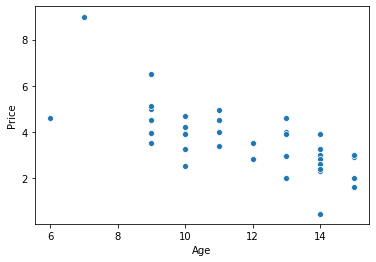

In [7]:
sns.scatterplot(age, price)
plt.xlabel('Age')
plt.ylabel('Price');

This function calculates the joint log-posterior, conditional on values for each paramter:

In [8]:
from scipy.stats import gamma, norm
dgamma = gamma.logpdf
dnorm = norm.logpdf

def calc_posterior(a, b, t, y=price, x=age):
    # Calculate joint posterior, given values for a, b and t

    # Priors on a,b
    logp = dnorm(a, 0, 10000) + dnorm(b, 0, 10000)
    # Prior on t
    logp += dgamma(t, 0.001, 0.001)
    # Calculate mu
    mu = a + b*x
    # Data likelihood
    logp += sum(dnorm(y, mu, t**-0.5))
    
    return logp

In [23]:
rnorm = np.random.normal
runif = np.random.rand
np.random.seed(42)

def metropolis(n_iterations, initial_values, prop_var=1):

    n_params = len(initial_values)
            
    # Initial proposal standard deviations
    prop_sd = [prop_var]*n_params
    
    # Initialize trace for parameters
    trace = np.empty((n_iterations+1, n_params))
    
    # Set initial values
    trace[0] = initial_values
        
    # Calculate joint posterior for initial values
    current_log_prob = calc_posterior(*trace[0])
    
    # Initialize acceptance counts
    accepted = [0]*n_params
    
    for i in range(n_iterations):
    
        if not i%1000: print('Iteration %i' % i)
    
        # Grab current parameter values
        current_params = trace[i]
    
        for j in range(n_params):
    
            # Get current value for parameter j
            p = trace[i].copy()
    
            # Propose new value
            if j==2:
                # Ensure tau is positive
                theta = np.exp(rnorm(np.log(current_params[j]), prop_sd[j]))
            else:
                theta = rnorm(current_params[j], prop_sd[j])
            
            # Insert new value 
            p[j] = theta
    
            # Calculate log posterior with proposed value
            proposed_log_prob = calc_posterior(*p)
    
            # Log-acceptance rate
            alpha = proposed_log_prob - current_log_prob
    
            # Sample a uniform random variate
            u = runif()
    
            # Test proposed value
            if np.log(u) < alpha:
                # Accept
                trace[i+1,j] = theta
                current_log_prob = proposed_log_prob
                accepted[j] += 1
            else:
                # Reject
                trace[i+1,j] = trace[i,j]
                
    return trace, accepted

Let's run the MH algorithm with a very small proposal variance:

In [24]:
n_iter = 5000
trace, acc = metropolis(n_iter, (1,0,1), 0.001)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000


We can see that the acceptance rate is way too high:

In [25]:
np.array(acc, float)/n_iter

array([0.9664, 0.9522, 0.9486])

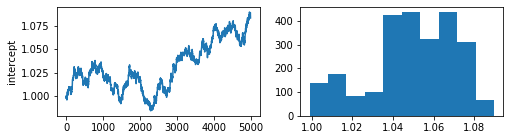

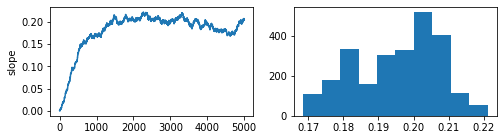

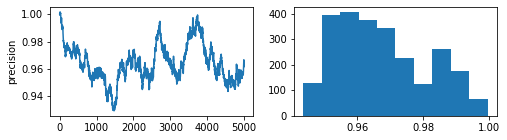

In [26]:
for param, samples in zip(['intercept', 'slope', 'precision'], trace.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(n_iter/2):])

Now, with a very large proposal variance:

In [27]:
trace_hivar, acc = metropolis(n_iter, (1,0,1), 20)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000


In [28]:
np.array(acc, float)/n_iter

array([0.0152, 0.0008, 0.0172])

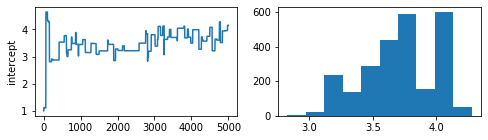

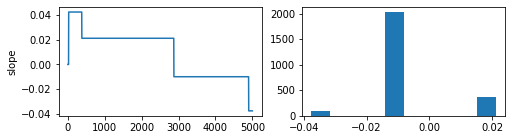

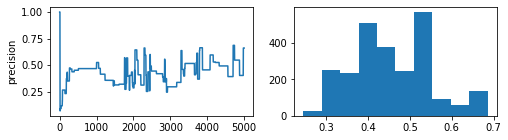

In [29]:
for param, samples in zip(['intercept', 'slope', 'precision'], trace_hivar.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(n_iter/2):])

In order to avoid having to set the proposal variance by trial-and-error, we can add some tuning logic to the algorithm. 

## Auto-tuning Metropolis-Hastings

We can modify the Metropolis-Hastings algorithm above by adding logic to automatically change the proposal scale depending on the acceptance rate of the chain. 

In [19]:
def metropolis_tuned(n_iterations, initial_values, prop_var=1, 
                     tune_for=None, tune_interval=100):
     
    n_params = len(initial_values)
             
    # Initial proposal standard deviations
    prop_sd = [prop_var] * n_params
     
    # Initialize trace for parameters
    trace = np.empty((n_iterations+1, n_params))
     
    # Set initial values
    trace[0] = initial_values
    # Initialize acceptance counts
    accepted = [0]*n_params
     
    # Calculate joint posterior for initial values
    current_log_prob = calc_posterior(*trace[0])
     
    if tune_for is None:
        tune_for = n_iterations/2
     
    for i in range(n_iterations):
     
        if not i%1000: print('Iteration %i' % i)
     
        # Grab current parameter values
        current_params = trace[i]
     
        for j in range(n_params):
     
            # Get current value for parameter j
            p = trace[i].copy()
     
            # Propose new value
            if j==2:
                # Ensure tau is positive
                theta = np.exp(rnorm(np.log(current_params[j]), prop_sd[j]))
            else:
                theta = rnorm(current_params[j], prop_sd[j])
             
            # Insert new value 
            p[j] = theta
     
            # Calculate log posterior with proposed value
            proposed_log_prob = calc_posterior(*p)
     
            # Log-acceptance rate
            alpha = proposed_log_prob - current_log_prob
     
            # Sample a uniform random variate
            u = runif()
     
            # Test proposed value
            if np.log(u) < alpha:
                # Accept
                trace[i+1,j] = theta
                current_log_prob = proposed_log_prob
                accepted[j] += 1
            else:
                # Reject
                trace[i+1,j] = trace[i,j]
                 
            # Tune every 100 iterations
            if (not (i+1) % tune_interval) and (i < tune_for):
         
                # Calculate aceptance rate
                acceptance_rate = (1.*accepted[j])/tune_interval
                if acceptance_rate<0.2:
                    prop_sd[j] *= 0.9
                elif acceptance_rate>0.5:
                    prop_sd[j] *= 1.1
                accepted[j] = 0
                 
    return trace[tune_for:], accepted

In [20]:
trace_tuned, acc = metropolis_tuned(n_iter, (1,0,1), tune_for=5000)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000


In [24]:
np.array(acc, float)/5000

array([0.3034, 0.253 , 0.308 ])

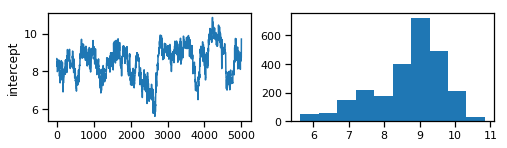

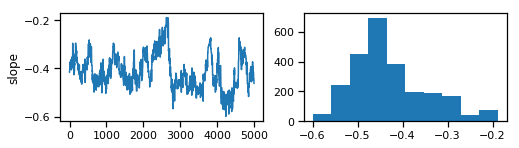

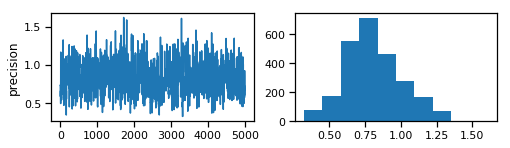

In [25]:
for param, samples in zip(['intercept', 'slope', 'precision'], trace_tuned.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(len(samples)/2):])

A useful way to informally examine the fit of the model is to examine functions of the posterior distribution. For example, here are 50 random regression lines drawn from the posterior:

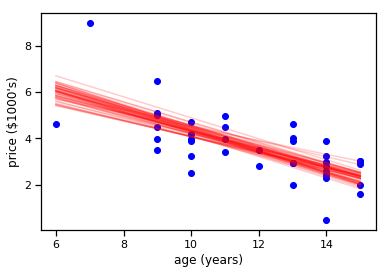

In [26]:
plt.plot(age, price, 'bo')
plt.xlabel('age (years)'); plt.ylabel('price ($1000\'s)')
xvals = np.linspace(age.min(), age.max())
for i in range(50):
    b0,b1,tau = trace_tuned[np.random.randint(0, 1000)]
    plt.plot(xvals, b0 + b1*xvals, 'r-', alpha=0.2)

## Exercise: Bioassay analysis

Gelman et al. (2003) present an example of an acute toxicity test, commonly performed on animals to estimate the toxicity of various compounds.

In this dataset `log_dose` includes 4 levels of dosage, on the log scale, each administered to 5 rats during the experiment. The response variable is `death`, the number of positive responses to the dosage.

The number of deaths can be modeled as a binomial response, with the probability of death being a linear function of dose:

$$\begin{aligned}
y_i &\sim \text{Bin}(n_i, p_i) \\
\text{logit}(p_i) &= a + b x_i
\end{aligned}$$

The common statistic of interest in such experiments is the **LD50**, the dosage at which the probability of death is 50%.

Use Metropolis-Hastings sampling to fit a Bayesian model to analyze this bioassay data, and to estimate LD50.

In [ ]:
# Log dose in each group
log_dose = [-.86, -.3, -.05, .73]

# Sample size in each group
n = 5

# Outcomes
deaths = [0, 1, 3, 5]

In [ ]:
# Write your answer here

# Hamiltonian Monte Carlo

**The code for this tutorial was taken from Colin Carroll's excellent blog post, [Hamiltonian Monte Carlo from Scratch](https://colindcarroll.com/2019/04/11/hamiltonian-monte-carlo-from-scratch/)**

While flexible and easy to implement, Metropolis-Hastings sampling is a random walk
sampler that might not be statistically efficient for many models. Specifically, for models of high dimension, random walk jumping algorithms do not perform well. It is not enough to simply guess at the next sample location; we need to make each iteration a useful draw from the posterior whenever we can, in order to have an efficient sampler for bigger models.

Since Bayesian inference is all about calculating expectations over posteriors, what we seek is an algorithm that explores the area of the parameter space that contains most of the non-zero probability. This region is called the **typical set**.

### What's a Typical Set?

The typical set is where most of the probability density (mass) lies in a particular volume associated with the distribution. As the dimension of a model increases, this set moves progressively further from the mode, and becomes more singular, as the result of concentration of measure.

The typical set is a product of both the density, which is highest at the mode, and volume (that we integrate over), which increasingly becomes larger away from the mode as dimensionality increases. In fact, at high dimensions, the region around the mode contributes almost nothing to the expectation. We need an algorithm that will find this narrow region and explore it efficiently.

![from Hoffman and Gelman 2014](http://d.pr/i/RAA+)

In this context, and when sampling from continuous variables, Hamiltonian (or Hybrid) Monte
Carlo (HMC) can prove to be a powerful tool. It avoids
random walk behavior by simulating a physical system governed by
Hamiltonian dynamics, potentially avoiding tricky conditional
distributions in the process.

## Pictures of what's going on


### Hamiltonian trajectories
Starting from any point, we can generate a new sample from a probability distribution by giving the point some momentum and then updating the position and momentum according to a certain system of differential equations (Hamilton's equations, whence the name). The differential equation depends on the probability distribution, and we update the position and momentum using "leapfrog integration". Here are three trajectories of a 2d multivariate normal. 

<img src='images/normal_leapfrog.png'/>

Calculating these trajectories is expensive, and we will do a lot of work to make this less expensive. Sometimes trajectories are not precisely ellipses. Here are three trajectories for a mixture of three normal distributions.

<img src='images/mixture_leapfrog.png'/>

Notice that the Hamiltonian dynamics preserve energy: the momentum is indicated by the size and direction of the arrows; when the trajectory is furthest away from one of the modes, the arrows are very small indicating large potential energy and small kinetic energy. There is also one trajectory that stays very close to a single mode because it does not have the energy to move to another.

### Hamiltonian Monte Carlo

Once we can generate these Hamiltonian trajectories, we fix an integration length, generate a trajectory of that length, and that is our next sample. Starting from that point, we pick a new momentum at random, and keep going. Here is an example of 10 draws from a 2D multivariate Gaussian with 3 different path lengths.

<img src='images/normal_hmc.png'/>

Notice that each trajectory starts from where the previous trajectory ended, but the momentum is totally different. In reality, we will make a much cruder estimate of the trajectory to save computing time, and accept or reject the proposal at the end of the trajectory, usually aiming to accept 60-80% of the time.

Here also are trajectories for a mixture of 3 multivariate normals, again with 3 different path lengths.

<img src='images/mixture_hmc.png'/>

Notice that mixing between modes can be hard, and can take time! The path length of 2 never makes it to a different mode! Of course, this is only drawing 10 samples, but it is something to keep in mind while tuning an HMC sampler.

## Hamiltonian Monte Carlo: The Math

In HMC, model samples are obtained by simulating a physical system,
where particles move about a high-dimensional landscape, subject to
potential and kinetic energies. Adapting the notation from [Neal (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html),
particles are characterized by a position vector or state
$s \in \mathcal{R}^D$ and velocity vector $\phi \in \mathcal{R}^D$. The
combined state of a particle is denoted as $\chi=(s,\phi)$. 

The joint **canonical distribution** of the position and velocity can be expressed as a product of the marginal position (which is of interest) and the conditional distribution of the velocity:

$$\pi(s, \phi) = \pi(\phi | s) \pi(s)$$

This joint probability can also be written in terms of an invariant **Hamiltonian function**:

$$\pi(s, \phi) \propto \exp(-H(s,\phi))$$

The Hamiltonian is then defined as the sum of potential energy $E(s)$ and kinetic energy
$K(\phi)$, as follows:

$$\mathcal{H}(s,\phi) = E(s) + K(\phi)
= E(s) + \frac{1}{2} \sum_i \phi_i^2$$

Instead of sampling $p(s, \phi)$ directly, HMC operates by sampling from the canonical distribution.

$$p(s,\phi) = \frac{1}{Z} \exp(-\mathcal{H}(s,\phi))=p(s)p(\phi)$$.

If we choose a momentum that is independent of position, marginalizing over $\phi$ is
trivial and recovers the original distribution of interest.

Note that the Hamiltonian $\mathcal{H}$ is independent of the parameterization of the model, and therefore, captures the geometry of the phase space distribution, including typical set. 

**Hamiltonian Dynamics**

State $s$ and velocity $\phi$ are modified such that
$\mathcal{H}(s,\phi)$ remains constant throughout the simulation. The
differential equations are given by:

$$\begin{aligned}\frac{ds_i}{dt} &= \frac{\partial \mathcal{H}}{\partial \phi_i} = \phi_i \\
\frac{d\phi_i}{dt} &= - \frac{\partial \mathcal{H}}{\partial s_i}
= - \frac{\partial E}{\partial s_i}
\end{aligned}$$

As shown in [Neal (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html), 
the above transformation preserves volume and is
reversible. The above dynamics can thus be used as transition operators
of a Markov chain and will leave $p(s,\phi)$ invariant. That chain by
itself is not ergodic however, since simulating the dynamics maintains a
fixed Hamiltonian $\mathcal{H}(s,\phi)$. HMC thus alternates Hamiltonian
dynamic steps, with Gibbs sampling of the velocity. Because $p(s)$ and
$p(\phi)$ are independent, sampling $\phi_{new} \sim p(\phi|s)$ is
trivial since $p(\phi|s)=p(\phi)$, where $p(\phi)$ is often taken to be
the univariate Gaussian.

**The Leap-Frog Algorithm**

In practice, we cannot simulate Hamiltonian dynamics exactly because of
the problem of time discretization. There are several ways one can do
this. To maintain invariance of the Markov chain however, care must be
taken to preserve the properties of *volume conservation* and *time
reversibility*. The **leap-frog algorithm** maintains these properties
and operates in 3 steps:

$$\begin{aligned}
\phi_i(t + \epsilon/2) &= \phi_i(t) - \frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t)) \\
s_i(t + \epsilon) &= s_i(t) + \epsilon \phi_i(t + \epsilon/2) \\
\phi_i(t + \epsilon) &= \phi_i(t + \epsilon/2) - \frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t + \epsilon)) 
\end{aligned}$$

We thus perform a half-step update of the velocity at time
$t+\epsilon/2$, which is then used to compute $s(t + \epsilon)$ and
$\phi(t + \epsilon)$.

Here is an implementation from [`minimc`](https://github.com/ColCarroll/minimc):

```python

def leapfrog(q, p, dVdq, path_len, step_size):
    """Leapfrog integrator for Hamiltonian Monte Carlo.

    Parameters
    ----------
    q : np.floatX
        Initial position
    p : np.floatX
        Initial momentum
    dVdq : callable
        Gradient of the velocity
    path_len : float
        How long to integrate for
    step_size : float
        How long each integration step should be

    Returns
    -------
    q, p : np.floatX, np.floatX
        New position and momentum
    """
    q, p = np.copy(q), np.copy(p)

    p -= step_size * dVdq(q) / 2  # half step
    for _ in range(int(path_len / step_size) - 1):
        q += step_size * p  # whole step
        p -= step_size * dVdq(q)  # whole step
    q += step_size * p  # whole step
    p -= step_size * dVdq(q) / 2  # half step

    # momentum flip at end
    return q, -p
```

**Accept / Reject**

In practice, using finite stepsizes $\epsilon$ will not preserve
$\mathcal{H}(s,\phi)$ exactly and will introduce bias in the simulation.
Also, rounding errors due to the use of floating point numbers means
that the above transformation will not be perfectly reversible.

HMC cancels these effects **exactly** by adding a Metropolis
accept/reject stage, after $n$ leapfrog steps. The new state
$\chi' = (s',\phi')$ is accepted with probability $p_{acc}(\chi,\chi')$,
defined as:

$$p_{acc}(\chi,\chi') = min \left( 1, \frac{\exp(-\mathcal{H}(s',\phi')}{\exp(-\mathcal{H}(s,\phi)} \right)$$

**HMC Algorithm**

We obtain a new HMC sample as follows:

1.  sample a new velocity from a univariate Gaussian distribution
2.  perform $n$ leapfrog steps to obtain the new state $\chi'$
3.  perform accept/reject move of $\chi'$

The `minimc` implementation of the HMC algorithm:

```python
from autograd import grad
import autograd.numpy as np
import scipy.stats as st


def hamiltonian_monte_carlo(n_samples, negative_log_prob, initial_position, path_len=1, step_size=0.5):
    """Run Hamiltonian Monte Carlo sampling.

    Parameters
    ----------
    n_samples : int
        Number of samples to return
    negative_log_prob : callable
        The negative log probability to sample from
    initial_position : np.array
        A place to start sampling from.
    path_len : float
        How long each integration path is. Smaller is faster and more correlated.
    step_size : float
        How long each integration step is. Smaller is slower and more accurate.

    Returns
    -------
    np.array
        Array of length `n_samples`.
    """    
    # autograd magic
    dVdq = grad(negative_log_prob)

    # collect all our samples in a list
    samples = [initial_position]

    # Keep a single object for momentum resampling
    momentum = st.norm(0, 1)

    # If initial_position is a 10d vector and n_samples is 100, we want 100 x 10 momentum draws
    # we can do this in one call to np.random.normal, and iterate over rows
    size = (n_samples,) + initial_position.shape[:1]
    for p0 in momentum.rvs(size=size):
        # Integrate over our path to get a new position and momentum
        q_new, p_new = leapfrog(
            samples[-1],
            p0,
            dVdq,
            path_len=path_len,
            step_size=step_size,
        )

        # Check Metropolis acceptance criterion
        start_log_p = negative_log_prob(samples[-1]) - np.sum(momentum.logpdf(p0))
        new_log_p = negative_log_prob(q_new) - np.sum(momentum.logpdf(p_new))
        if np.log(np.random.rand()) < start_log_p - new_log_p:
            samples.append(q_new)
        else:
            samples.append(np.copy(samples[-1]))

    return np.array(samples[1:])

```

Now, let's see the code in action

## Leapfrog Integration

In [1]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

# Using code from https://github.com/ColCarroll/minimc/tree/e6948430447ec94240568540d42405a51d3aca26
from minimc.minimc_slow import leapfrog, hamiltonian_monte_carlo
from minimc import neg_log_mvnormal

In [2]:
# Plotting helper function
def neg_log_p_to_img(neg_log_p, extent=None, num=100):
    if extent is None:
        extent = (-3, 3, -3, 3)
    X, Y = np.meshgrid(np.linspace(*extent[:2], num), np.linspace(*extent[2:], num))
    Z = np.array([np.exp(-neg_log_p(j)) for j in np.array((X.ravel(), Y.ravel())).T]).reshape(X.shape)
    return Z, extent

### Example: Bivariate normal leapfrog integrations

In [3]:
np.random.seed(1)

neg_log_p = neg_log_mvnormal(np.zeros(2), np.eye(2))
dVdq = grad(neg_log_p)

positions, momentums = [], []
for _ in range(3):
    q, p = np.random.randn(2, 2)
    _, _, q, p = leapfrog(q, p, dVdq, 2 * np.pi, 0.01)
    positions.append(q)
    momentums.append(p)

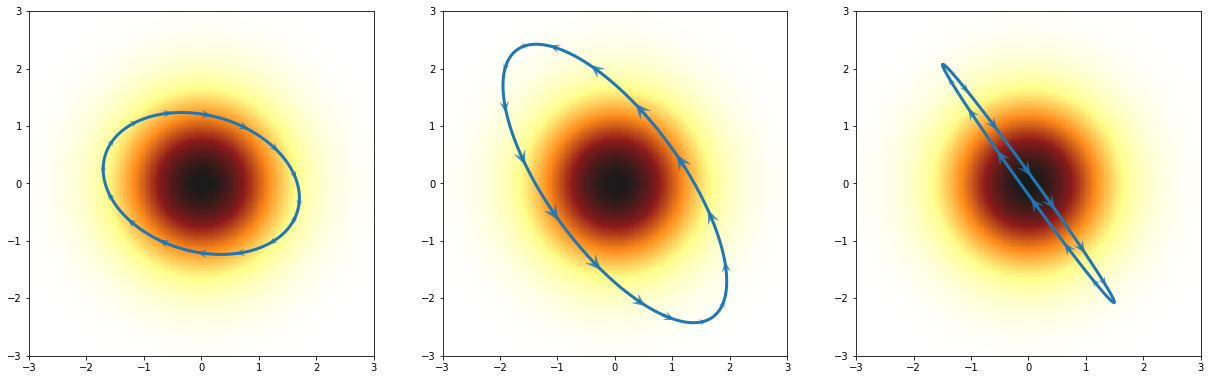

In [4]:
fig, axes = plt.subplots(ncols=len(positions), figsize=(7 * len(positions), 7))


steps = slice(None, None, 40)

Z, extent = neg_log_p_to_img(neg_log_p, (-3, 3, -3, 3), num=200)

for idx, (ax, q, p) in enumerate(zip(axes.ravel(), positions, momentums)):
    ax.imshow(Z, alpha=0.9, extent=extent, cmap='afmhot_r', origin='top')

    ax.quiver(q[steps, 0], q[steps, 1], p[steps, 0], p[steps, 1], headwidth=6, scale=60, headlength=7, alpha=0.8, color='C0')
    ax.plot(q[:, 0], q[:, 1], '-', lw=3, color='C0')


### Example: Normal mixture distribution

In [5]:
from minimc import mixture, neg_log_mvnormal

np.random.seed(7)

mu1 = np.ones(2)
cov1 = 0.5 * np.array([[1., 0.7],
                       [0.7, 1.]])
mu2 = -mu1
cov2 = 0.2 * np.array([[1., -0.6],
                       [-0.6, 1.]])

mu3 = np.array([-1., 2.])
cov3 = 0.3 * np.eye(2)

neg_log_p = mixture([neg_log_mvnormal(mu1, cov1), neg_log_mvnormal(mu2, cov2), neg_log_mvnormal(mu3, cov3)], [0.3, 0.3, 0.4])
dVdq = grad(neg_log_p)


positions, momentums = [], []
for _ in range(3):
    q, p = np.random.randn(2, 2)
    _, _, q, p = leapfrog(q, p, dVdq, 4 * np.pi, 0.01)
    positions.append(q)
    momentums.append(p)

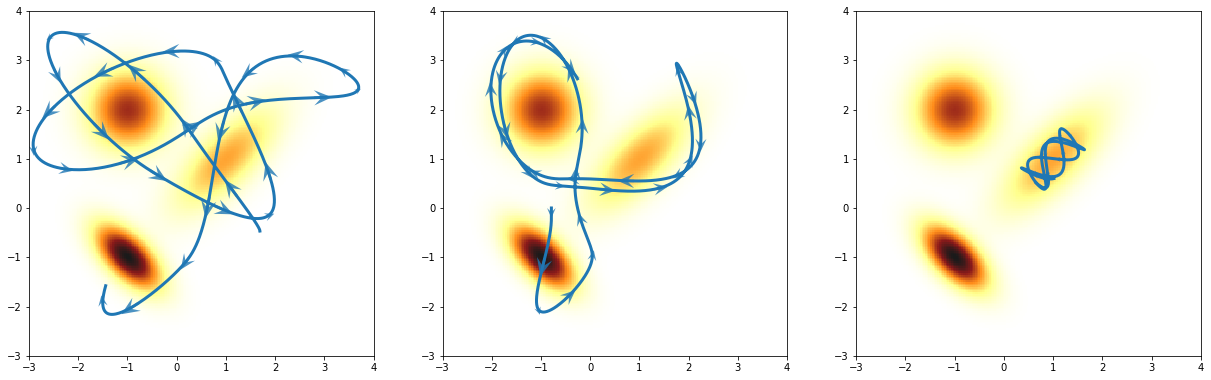

In [6]:
fig, axes = plt.subplots(ncols=len(positions), figsize=(7 * len(positions), 7))


steps = slice(None, None, 40)

Z, extent = neg_log_p_to_img(neg_log_p, (-3, 4, -3, 4), num=200)

for idx, (ax, q, p) in enumerate(zip(axes.ravel(), positions, momentums)):
    ax.imshow(Z, alpha=0.9, extent=extent, cmap='afmhot_r', origin='top')

    ax.quiver(q[steps, 0], q[steps, 1], p[steps, 0], p[steps, 1], headwidth=6, scale=60, headlength=7, alpha=0.8, color='C0')
    ax.plot(q[:, 0], q[:, 1], '-', lw=3, color='C0')


## Hamiltonian Monte Carlo

### Example: Bivariate normal 

In [7]:
np.random.seed(4)

neg_log_p = neg_log_mvnormal(np.zeros(2), np.eye(2))
ss, pp, mm, pl = [], [], [], [1, 2, 4]
for path_len in pl:
    samples, positions, momentums, accepted = hamiltonian_monte_carlo(10, neg_log_p, np.random.randn(2), path_len=path_len, step_size=0.01)
    ss.append(samples)
    pp.append(positions)
    mm.append(momentums)

100%|██████████| 10/10 [00:01<00:00,  7.72it/s]


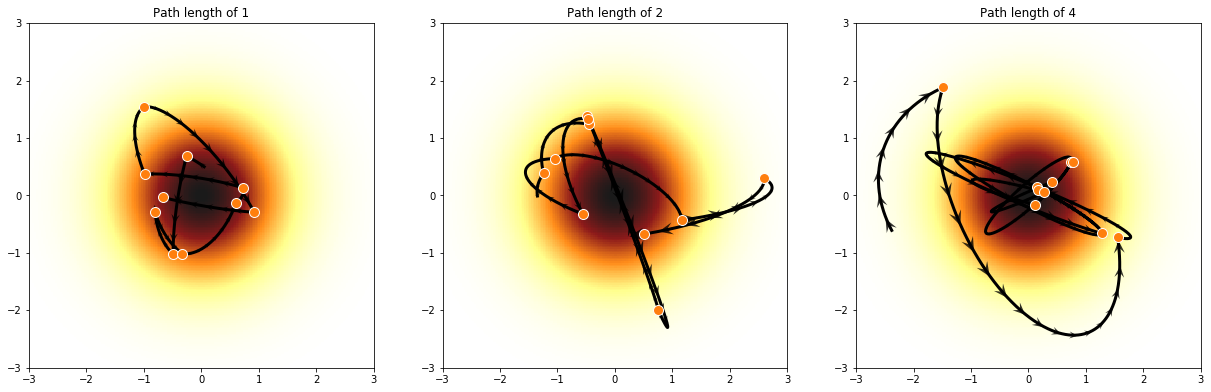

In [8]:
fig, axes = plt.subplots(ncols=len(ss), figsize=(7 * len(ss), 7))

Z, extent = neg_log_p_to_img(neg_log_p, (-3, 3, -3, 3), num=200)
steps = slice(None, None, 20)

for ax, samples, positions, momentums, path_len in zip(axes.ravel(), ss, pp, mm, pl):
    ax.imshow(Z, alpha=0.9, extent=extent, cmap='afmhot_r', origin='top')

    for q, p in zip(positions, momentums):
        ax.quiver(q[steps, 0], q[steps, 1], p[steps, 0], p[steps, 1], headwidth=6, scale=60, headlength=7, alpha=0.8)
        ax.plot(q[:, 0], q[:, 1], 'k-', lw=3)

    ax.plot(samples[:, 0], samples[:, 1], 'o', color='w', mfc='C1', ms=10)
    ax.set_title(f'Path length of {path_len}')


### Example: Normal mixture 

In [9]:
np.random.seed(4)

mu1 = np.ones(2)
cov1 = 0.5 * np.array([[1., 0.7],
                       [0.7, 1.]])
mu2 = -mu1
cov2 = 0.2 * np.array([[1., -0.6],
                       [-0.6, 1.]])

mu3 = np.array([-1., 2.])
cov3 = 0.3 * np.eye(2)

neg_log_p = mixture([neg_log_mvnormal(mu1, cov1), neg_log_mvnormal(mu2, cov2), neg_log_mvnormal(mu3, cov3)], [0.3, 0.3, 0.4])


ss, pp, mm, pl = [], [], [], [1, 2, 4]
for path_len in pl:
    samples, positions, momentums, accepted = hamiltonian_monte_carlo(10, neg_log_p, np.random.randn(2), path_len=path_len, step_size=0.01)
    ss.append(samples)
    pp.append(positions)
    mm.append(momentums)

100%|██████████| 10/10 [00:03<00:00,  2.60it/s]


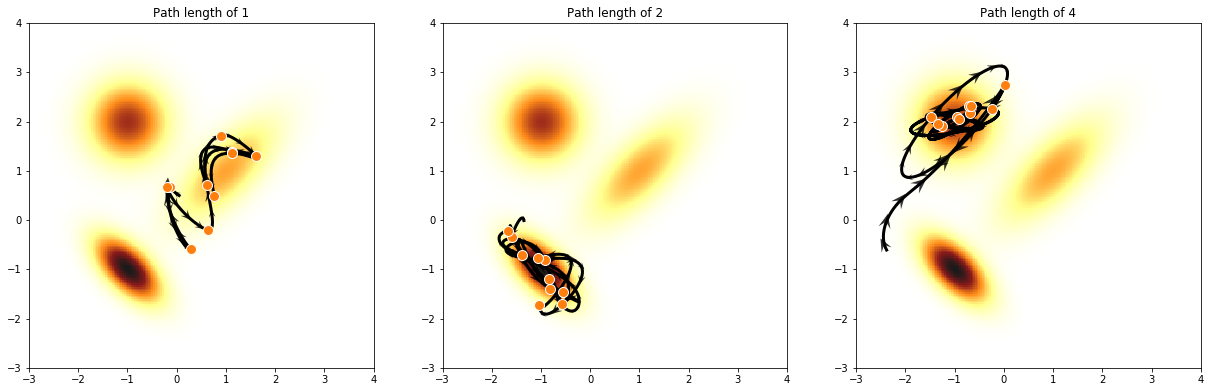

In [10]:
fig, axes = plt.subplots(ncols=len(ss), figsize=(7 * len(ss), 7))

Z, extent = neg_log_p_to_img(neg_log_p, (-3, 4, -3, 4), num=200)
steps = slice(None, None, 20)

for ax, samples, positions, momentums, path_len in zip(axes.ravel(), ss, pp, mm, pl):
    ax.imshow(Z, alpha=0.9, extent=extent, cmap='afmhot_r', origin='top')

    for q, p in zip(positions, momentums):
        ax.quiver(q[steps, 0], q[steps, 1], p[steps, 0], p[steps, 1], headwidth=6, scale=60, headlength=7, alpha=0.8)
        ax.plot(q[:, 0], q[:, 1], 'k-', lw=3)

    ax.plot(samples[:, 0], samples[:, 1], 'o', color='w', mfc='C1', ms=10)
    ax.set_title(f'Path length of {path_len}')


The HMC sampler can get into trouble, displaying pathologies with difficult model structures. For example, hierarchical models often feature relationships between the mixture scale parameter and individual parameters within the associated cluster. This results in a "funnel" distribution when plotted as a bivariate relationship. This geometry is hard for HMC to integrate, and results in divergences.

In [11]:
from minimc import neg_log_normal

def neg_log_funnel():
    scale = neg_log_normal(0, 1)
    def neg_log_p(x):
        funnel_dim = x.shape[0] - 1
        if funnel_dim == 1:
            funnel = neg_log_normal(0, np.exp(2 * x[0]))
        else:
            funnel = neg_log_mvnormal(np.zeros(funnel_dim), np.exp(2 * x[0]) * np.eye(funnel_dim))
        return scale(x[0]) + funnel(x[1:])
    return neg_log_p

In [12]:
from autograd import value_and_grad

In [13]:
value_and_grad(neg_log_p)(np.array([0., 2]))

(3.212624892569061, array([3.29105528, 0.02818537]))

In [14]:
np.random.seed(3)
neg_log_p = neg_log_funnel()
dVdq = grad(neg_log_p)


positions, momentums = [], []
for _ in range(3):
    q, p = np.random.randn(2, 2)
    _, _, q, p = leapfrog(q, p, dVdq, 4 * np.pi, 0.01)
    positions.append(q)
    momentums.append(p)

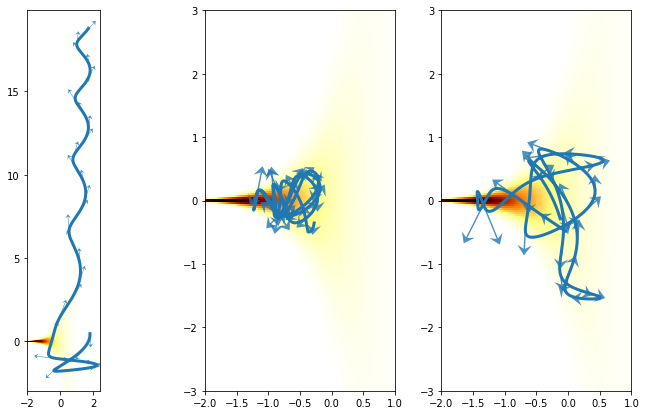

In [15]:
fig, axes = plt.subplots(ncols=len(positions), figsize=(4* len(positions), 7))


steps = slice(None, None, 40)

Z, extent = neg_log_p_to_img(neg_log_p, (-2, 1, -3, 3), num=200)

for idx, (ax, q, p) in enumerate(zip(axes.ravel(), positions, momentums)):
    ax.imshow(Z, alpha=1, extent=extent, cmap='afmhot_r', origin='top')

    ax.quiver(q[steps, 0], q[steps, 1], p[steps, 0], p[steps, 1], headwidth=10, scale=10, headlength=7, alpha=0.8, color='C0')
    ax.plot(q[:, 0], q[:, 1], '-', lw=3, color='C0')


## The No U-Turn Sampler (NUTS)

A disadgantage of the HMC sampler is that there are key hyperparameters that require tuning for sampling to proceed efficiently. Hoffman and Gelman (2014) developed an auto-tuning variant of HMC that takes care of selecting path lengths and step sizes.

NUTS uses a recursive algorithm to build a set of likely candidate points that spans a wide swath of the target distribution. True to its name, it stops automatically when it starts to double back and retrace its steps.

The algorithm employs **binary doubling**, which takes leapfrog steps alternating in direction with respect to the initial gradient. That is, one step is taken in the forward direction, two in the reverse direction, then four, eight, etc. The result is a balanced, binary tree with nodes comprised of Hamiltonian states. 

![](images/binary_doubling.png)

Doubling process builds a balanced binary tree whose leaf nodes correspond to
position-momentum states. Doubling is halted when the subtrajectory from the
leftmost to the rightmost nodes of any balanced subtree of the overall binary tree starts to double back on itself

![](images/uturn.png)

To ensure detailed balance, a slice variable is sampled from:

$$ u \sim \text{Uniform}(0, \exp[L(\theta) - 0.5 r \cdot r])$$

where $r$ is the initial momentum vector. The next sample is then chosen uniformly from the points in the remaining balanced tree.

___
## References

- **Neal, R. M. (2010)** [MCMC using Hamiltonian dynamics](http://www.mcmchandbook.net/HandbookChapter5.pdf), in the Handbook of Markov Chain Monte Carlo, S. Brooks, A. Gelman, G. L. Jones, and X.-L. Meng (editors), Chapman & Hall / CRC Press, pp. 113-162.
- **Christopher Bishop's "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book)"** A classic machine learning textbook, and gives a good overview of motivating sampling, as well as a number of different sampling strategies.
- **Iain Murray's [lectures at the MLSS](http://videolectures.net/mlss09uk_murray_mcmc/)** A good, approachable lecture, including intuition about how these algorithms are applied and implemented
- **Michael Betancourt's "[A Conceptual Introduction to Hamiltonian Monte Carlo](https://arxiv.org/abs/1701.02434)"** A thorough, readable reference that is the main source here
- **Hoffman, M. D., and A. Gelman. (2014)**. “The No-U-Turn Sampler: Adaptively Setting Path Lengths in Hamiltonian Monte Carlo.” Journal of Machine Learning Research: JMLR 15 (1): 1593–1623.